# Data analysis influce of the Covid-19 pandemic
<span style="color:red">TBD: short description about the whole project:

In recent years, the intersection of financial markets and global health crises has emerged as a pivotal area of study, particularly in the context of the COVID-19 pandemic. This research project aims to delve into the intricate relationship between developments in the capital market, with a specific focus on Bitcoin (BTC), and various metrics associated with the COVID-19 pandemic. The unprecedented nature of the COVID-19 crisis, coupled with the dynamic and evolving landscape of digital currencies, presents a unique opportunity to explore potential correlations and influences between these two domains.

The emergence and global spread of COVID-19 have had profound impacts on economies and financial markets worldwide. At the same time, the cryptocurrency market, especially Bitcoin, has experienced significant fluctuations, raising questions about the influence of global crises on digital assets. This project seeks to analyze the data from the capital markets and the evolving situations of the COVID-19 pandemic to identify potential correlations and patterns. The analysis will primarily focus on how pandemic-related developments, such as infection rates, governmental responses, vaccine distribution, and economic impacts, may correlate with the behavior of Bitcoin in the capital market.
Utilizing a range of statistical and data analysis methodologies, this project aims to provide a comprehensive examination of these correlations. By employing techniques such as correlation analysis, time series analysis, and advanced predictive models, this study strives to unravel the complexities of this relationship. The insights derived from this research could not only contribute to our understanding of the impact of global health crises on financial markets but also shed light on the resilience and behavior of decentralized digital currencies in the face of such events.
In exploring these themes, this project aims to contribute to the broader discourse on the interplay between health crises and financial markets, offering valuable insights for investors, policymakers, and researchers alike. As the world navigates through the uncharted territories of pandemic management and economic recovery, understanding these dynamics becomes increasingly critical</span>.
</br></br>
<span style="color:red">TBD: Update all tables before submittion</span>.
</br></br>
<span style="color:red">TBD: add plots which show the sizes of the different table</span>.

In [4]:
# Initial imports for data handling and visualization
import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For advanced data visualization
import numpy as np  # For numerical operations

# Additional imports for plotting and date handling
import matplotlib.pyplot as plt  # For creating static plots
import matplotlib.dates as mdates  # For handling date formats in plots
from sklearn.preprocessing import MinMaxScaler
import warnings

### Load Covid Data From CSV File
The dataset is provided by the World Health Organisation: https://ourworldindata.org/covid-cases (last accessed: 13.12.2023)

<span style="color:red">TBD: What are the data about? Explain short which facts are how often (daily) displayed in the table
In the comprehensive analysis of various datasets, each segment focuses on distinct aspects of COVID-19 data and financial indices, utilizing appropriate preprocessing and visualization techniques to extract meaningful insights:

1. **COVID-19 Data Descriptive Statistics**: The analysis begins with a statistical summary of COVID-19 data, encompassing new cases, deaths, tests, and vaccinations. Essential statistical measures like the mean, standard deviation, and percentiles are computed, providing a foundational understanding of the data's distribution and variability.

2. **Total COVID-19 Cases by Continent**: Here, the data is aggregated to show the total number of COVID-19 cases per continent. This involves grouping the data by continent and summing up the total cases. A bar chart is employed for visualization, effectively comparing the case counts across different continents and highlighting regional differences in the pandemic's impact.

3. **COVID-19 Cases Over Time by Continent**: This part tracks the progression of COVID-19 cases over time across different continents. The dataset is filtered to exclude incomplete data and grouped by date and continent. A line chart is chosen for this visualization, adeptly depicting trends and changes in the pandemic's trajectory over time for each continent.

4. **Geographical Spread of COVID-19**: Focusing on a more dynamic representation, an animated map visualizes the spread of COVID-19 over time across various countries. This involves preprocessing steps like date conversion and handling missing values. The animated map offers an engaging and intuitive way to understand the geographical progression of the pandemic.

5. **EU Comparative COVID-19 Analysis**: Turning to Europe, the analysis compares COVID-19 metrics like total cases, deaths, case fatality rates, and vaccination rates across European countries. Additional metrics are calculated, and the latest vaccination data is incorporated. A bar chart is used here, facilitating a clear comparison between European nations across multiple pandemic-related metrics.

6. **Financial Indices vs. COVID-19 Cases Linear Regression**: In a unique turn, the relationship between financial indices (Bitcoin, S&P 500, Dow Jones) and total COVID-19 cases is explored through linear regression. This involves merging the COVID-19 case data with financial indices based on dates. The resulting scatter plots with regression lines reveal the nature of the relationship between these financial markets and the pandemic.

7. **Financial Indices and COVID-19 Cases Correlation Analysis**: Lastly, the analysis examines the correlation between the S&P 500, Bitcoin prices, and new COVID-19 cases in the United States. By computing rolling correlations and using different correlation methods, the study provides a nuanced view of how financial indices correlate with pandemic trends over time. The visualization here is a time series plot, showcasing the evolving nature of these correlations.

Each segment of this analysis is carefully tailored to extract and illustrate specific insights from the data, employing a range of statistical and visual tools to enhance our understanding of the multifaceted impacts of the COVID-19 pandemic.</span>

In [3]:
#Read in the dataset and plot 5 random rows
covid_data_df = pd.read_csv('Data/owid-covid-data.csv')
covid_data_df.sample(n=5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
74371,HRV,Europe,Croatia,2023-04-30,1272377.0,0.0,79.857,18155.0,0.0,3.714,...,39.9,NaN,5.54,78.49,0.851,4030361.0,22605.697,13.09,-2.08,5639.279
90363,EGY,Africa,Egypt,2023-11-22,516023.0,0.0,0.000,24830.0,0.0,0.000,...,50.1,89.827,1.60,71.99,0.707,110990096.0,NaN,NaN,NaN,NaN
32476,BLZ,North America,Belize,2022-07-02,63966.0,171.0,155.857,680.0,1.0,0.143,...,NaN,90.083,1.30,74.62,0.716,405285.0,NaN,NaN,NaN,NaN
125368,GRD,North America,Grenada,2021-09-25,4638.0,86.0,196.571,98.0,13.0,7.429,...,NaN,NaN,3.70,72.40,0.779,125459.0,NaN,NaN,NaN,NaN
59429,CAF,Africa,Central African Republic,2021-09-05,11309.0,0.0,0.429,100.0,0.0,0.000,...,NaN,16.603,1.00,53.28,0.397,5579148.0,NaN,NaN,NaN,NaN


In [4]:
#Returns the shape of the dataframe, for more detail information use the command: 'covid_data_df.info()'
covid_data_df.shape

(362259, 67)

In [5]:
# Convert to date time object, use 'covid_data_df.dtypes' to see the datatypes
covid_data_df['date'] = pd.to_datetime(covid_data_df['date'])

# Data visualization and pre-processing
<span style="color:red">Which data are be visualized and what kind of pre-processing is done?
In the code snippet, we are observing the following steps:

Data Aggregation: The code aggregates the total cases of COVID-19 for each continent using the groupby method on the 'continent' column and then sums up the 'total_cases'. This aggregated data is reset to a new DataFrame using reset_index() to ensure that 'continent' is included as a column for the bar chart.

Color Palette Setup: A color palette is being generated using the Seaborn library's color_palette function. The 'hsv' argument specifies the color space from which the colors will be generated, and the number of unique continents determines the number of colors.

Bar Chart Creation: A bar chart is created using Seaborn's barplot function. Each continent's total cases are represented by bars with different colors as determined by the previously set palette. The figure's size is adjusted to ensure that the data is displayed clearly.

Labels and Title: For clarity and context, labels for the x-axis ('Continent') and y-axis ('Total Cases (in billions)') are added, along with a title for the chart ('Total COVID-19 Cases per Continent in Billions').

Plot Display: Finally, the plot is displayed with plt.show().

The resulting visualization, as seen in the second image, is a bar chart where the x-axis represents continents, and the y-axis represents the total COVID-19 cases in billions. Each bar's height corresponds to the total number of cases on that continent, providing a clear visual comparison between them.

Bar charts are an excellent choice for this type of data because they allow for easy comparison of categorical data across different groups. In this case, it enables viewers to quickly compare the total number of COVID-19 cases across different continents. The colors help distinguish between the continents, making the data more accessible</span>

<span style="color:red; font-weight: 600">Important: Add (Code) descriptive statistics about total cases. Like standard deviation, ...

ADD FINANCIAL DATASETS!!!</span>

1. **Count**: The amount of the total datapoints.

2. **Mean**: The average of all values inside of the dataset for the specific index.

3. **Std (Standard Deviation)**: Reflects the variability of the data; higher values mean greater scatter.

4. **Min (Minimum)**: The smallest value in the data.

5. **25% (25th Percentile)**: One quarter of the data is below this value.

6. **50% (Median or 50th Percentile)**: Half the data is less than this value, and the other half is more.

7. **75% (75th Percentile)**: Three quarters of the data is below this value.

8. **Max (Maximum)**: The biggest value. It's the highest number in your data.



In [6]:
#print(covid_data_df.columns)
covid_data_df_statistic = covid_data_df[['new_cases', 'new_deaths', 'new_tests', 'new_vaccinations']]
np.round(covid_data_df_statistic.describe(), 2).T

,count,mean,std,min,25%,50%,75%,max
new_cases,352486.0,9283.34,108394.57,0.0,0.0,1.0,235.0,8401963.0
new_deaths,352534.0,82.68,625.79,0.0,0.0,0.0,2.0,57167.0
new_tests,75403.0,67285.41,247734.00,1.0,2244.0,8783.0,37229.0,35855632.0
new_vaccinations,66337.0,789431.77,3285921.74,0.0,2542.0,24098.0,202530.0,49673197.0


## Total COVID-19 Cases per Continent in Millions
<span style="color:red">Describe what will be plotted in the following: Especially the kind of diagramms (Bar Chart and line chart). Why are these diagramms used?</span>

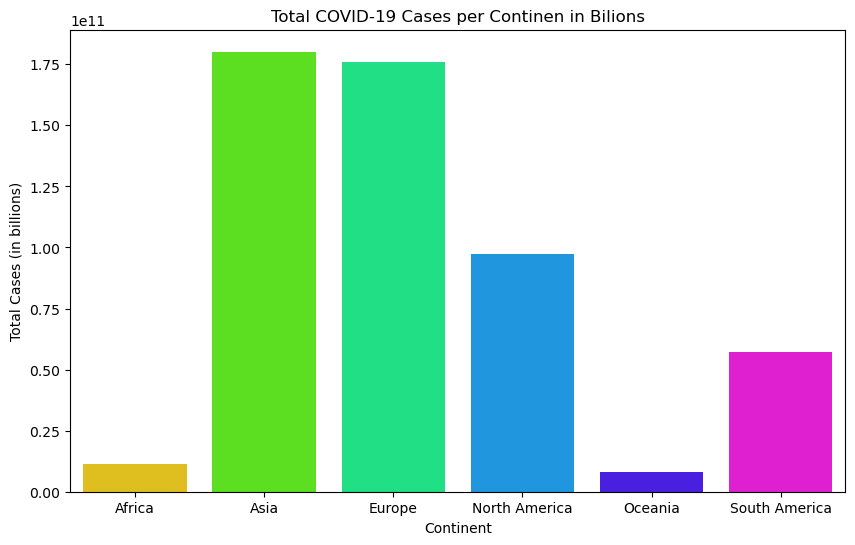

In [7]:
# Summing up the total cases for each continent
total_cases_per_continent = covid_data_df.groupby('continent')['total_cases'].sum().reset_index()

# Setting up the color palette for different continents
palette = sns.color_palette("hsv", len(total_cases_per_continent['continent'].unique()))

# Creating a bar plot with a different color for each continent
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x='continent', y='total_cases', data=total_cases_per_continent, palette=palette)

# Adding labels and title for clarity
plt.xlabel('Continent')
plt.ylabel('Total Cases (in billions)')
plt.title('Total COVID-19 Cases per Continen in Bilions')

# Displaying the plot
plt.savefig('Figures/Covid19PerContinentTotal.png')
plt.show()

## Total COVID-19 Cases per Continent Over Time in millions
<span style="color:red">Describe what will be plotted in the following: Especially the kind of diagramms (Bar Chart and line chart). Why are these diagramms used?</span>

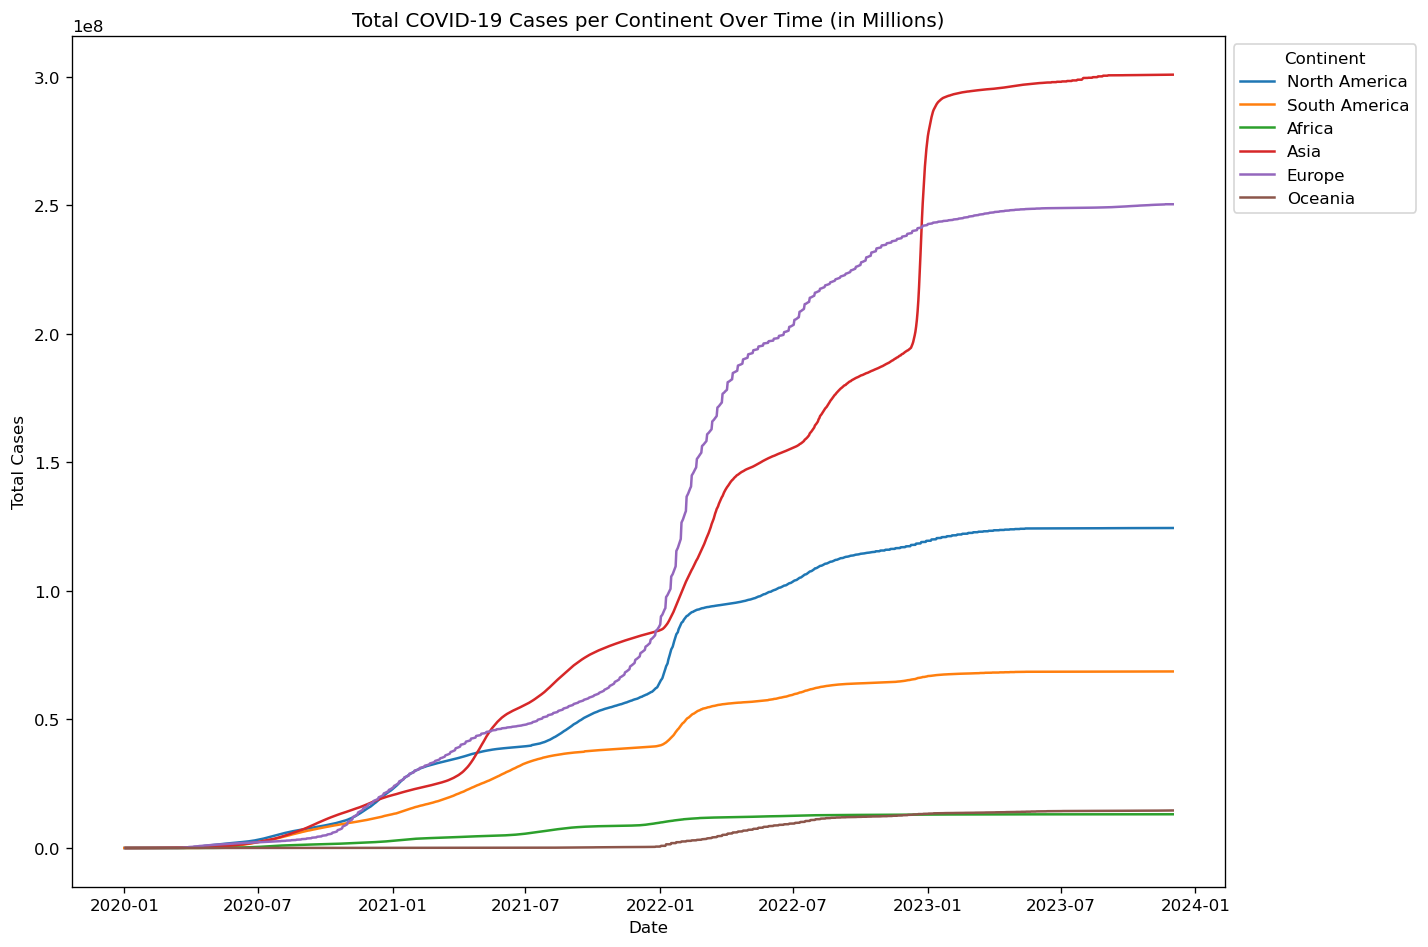

In [8]:
#cutting of the data that causing the drop in the graph, probably due to incomplete dataset
cutoff_date = pd.to_datetime('2023-12-01') 
# r data to exclude dates that may have incomplete data
covid_data_df_filtered = covid_data_df[covid_data_df['date'] <= cutoff_date]

# Sum total cases for each continent on each date
total_cases_per_continent_date = covid_data_df_filtered.groupby(['date', 'continent'])['total_cases'].sum().reset_index()

# Create a high-resolution line plot
plt.figure(figsize=(12, 8), dpi=120)  # Higher DPI for better resolution
sns.lineplot(x='date', y='total_cases', hue='continent', data=total_cases_per_continent_date, palette='tab10')

# Improve date format on x-axis for readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as Year-Month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Adjust interval as needed

# Adding labels, title, and grid
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('Total COVID-19 Cases per Continent Over Time (in Millions)')

# Improve legend
plt.legend(title='Continent', loc='upper left', bbox_to_anchor=(1, 1))  # Move legend out of the plot

# Display the plot
plt.tight_layout()  # Adjust layout
plt.savefig('Figures/Covid19PerContinentOverTime.png')
plt.show()

# Visualisation Spead Of Covid-19 Over Time by Country in a map
<span style="color:red">Explain the map and the plot.</span>

In [ ]:

import plotly.express as px

# Convert 'date' to datetime and filter out any rows with nan values in 'iso_code' or 'total_cases'
covid_data = covid_data_df.dropna(subset=['iso_code', 'total_cases'])
covid_data['date'] = pd.to_datetime(covid_data['date'])

# Ensure there are no nan dates
covid_data = covid_data[~covid_data['date'].isna()]

# Create the animated map
fig = px.scatter_geo(covid_data,
                     locations='iso_code',  # Using ISO codes for countries
                     color='total_cases',  # Representing the total number of cases
                     hover_name='location',  # Showing country name on hover
                     size='total_cases',  # The size of the dots represents the number of cases
                     animation_frame=covid_data['date'].dt.strftime('%Y-%m-%d'),  # Converting dates to string format for animation frames
                     projection='natural earth',  # Map projection style
                     title='Spread of COVID-19 Over Time by Country')

fig.update_layout(autosize=True)
fig.show()

# Comperative Analysis of the COVID-19 data in the EU
<span style="color:red">Describe what will be done</span>

In [1]:
# Filtering the dataset for European countries
europe_data = covid_data_df[covid_data_df['continent'] == 'Europe']

# Selecting relevant metrics for comparison
europe_metrics = europe_data.groupby('location').agg(
    total_cases=('total_cases', 'max'),
    total_deaths=('total_deaths', 'max'),
    population=('population', 'mean')
).reset_index()

# Calculating additional metrics
europe_metrics['case_fatality_rate'] = europe_metrics['total_deaths'] / europe_metrics['total_cases']
europe_metrics['cases_per_100k'] = (europe_metrics['total_cases'] / europe_metrics['population']) * 100000
europe_metrics['deaths_per_100k'] = (europe_metrics['total_deaths'] / europe_metrics['population']) * 100000

# Since the latest vaccination data might be more relevant, filter for the most recent data for each country
latest_dates = europe_data.groupby('location')['date'].max()
latest_vaccination_data = europe_data[europe_data.set_index(['location', 'date']).index.isin(latest_dates.items())]

# Merging the latest vaccination data
europe_metrics = europe_metrics.merge(
    latest_vaccination_data[['location', 'people_vaccinated_per_hundred']], on='location', how='left'
)

# Display the complete dataframe
# You can use .to_string() if the dataframe is not fully displayed in your environment
#print(europe_metrics.sort_values(by='total_cases', ascending=False).to_string())

NameError: name 'covid_data_df' is not defined

## Visualisation of the Comperative Analysis
<span style="color:red">Give a reason why we plot the comperative analysis.</span>

In [2]:
# Selecting relevant metrics for comparison
europe_metrics = europe_data.groupby('location').agg(
    total_cases=('total_cases', 'max'),
    total_deaths=('total_deaths', 'max'),
    population=('population', 'mean')
).reset_index()

# Calculating additional metrics
europe_metrics['case_fatality_rate'] = europe_metrics['total_deaths'] / europe_metrics['total_cases']
europe_metrics['cases_per_100k'] = (europe_metrics['total_cases'] / europe_metrics['population']) * 100000
europe_metrics['deaths_per_100k'] = (europe_metrics['total_deaths'] / europe_metrics['population']) * 100000

# Since the latest vaccination data might be more relevant, filter for the most recent data for each country
latest_dates = europe_data.groupby('location')['date'].max()
latest_vaccination_data = europe_data[europe_data.set_index(['location', 'date']).index.isin(latest_dates.items())]

# Merging the latest vaccination data
europe_metrics = europe_metrics.merge(
    latest_vaccination_data[['location', 'people_vaccinated_per_hundred']], on='location', how='left')

# Plotting
# Bar Chart of Total Cases and Deaths per 100k
plt.figure(figsize=(15, 5))
europe_metrics_sorted = europe_metrics.sort_values(by='cases_per_100k', ascending=False)
sns.barplot(x='location', y='cases_per_100k', data=europe_metrics_sorted, color='blue', label='Cases per 100k')
sns.barplot(x='location', y='deaths_per_100k', data=europe_metrics_sorted, color='red', label='Deaths per 100k')
plt.xticks(rotation=90)
plt.legend()
plt.title('Total COVID-19 Cases and Deaths per 100k in European Countries')
plt.xlabel('Country')
plt.ylabel('Count per 100k')
plt.savefig('Figures/Covid19DeathsEurope.png')
plt.show()

NameError: name 'europe_data' is not defined

## Slope, Intercept, R-Value (correlations), STE and Descriptive Statistic for different the assets
<span style="color:red">Explain why we try to find a simple linear regression between the bitcoin and Total Covid-19 cases</span>
</br></br>
<span style="color:red; font-weight: 600">Häusler: Why do we do the regression? -> What question would we anser?</span>
</br></br>
<span style="color:red">@Dominic. Adjust the date format from the bitcoin.xlsx or use the csv file which max and me use</span>

In the following parth to be described slop, intercept, corelation coeffiecient (r-value), STE

r_value represents the correlation coefficient between the total number of COVID-19 cases and the price of Bitcoin. It measures the strength and direction of the linear relationship between these two variables. An r-value close to 1 or -1 indicates a strong positive or negative linear relationship, respectively, while an r-value close to 0 indicates a weak linear relationship.


THERE IS AN EXAMPLE OF HOW TO INTERPRET THE VALUES UNDER THE BTC


In [11]:
#Read in the dataset and plot 5 random rows
btc_data_df = pd.read_excel('Data/BTCinUSD.xlsx')
btc_data_df.sample(n=5)

,Date,Price,Open,High,Low,Vol.,Change %
746,12/16/2021,"42,045.6","43,277.8","43,799.0","42,000.8",1.86K,-2.85%
979,04/27/2021,"45,579.3","44,750.0","45,579.3","44,750.0",3.38K,+1.85%
56,2023-06-11 00:00:00,"32,704.2","32,681.6","32,840.5","32,400.0",1.01K,+0.07%
836,09/17/2021,"40,339.9","40,617.8","40,919.9","39,910.0",1.87K,-0.68%
421,2022-06-11 00:00:00,"21,063.8","21,376.4","21,431.0","21,055.0",0.51K,-1.46%


# Descriptive statistics for the BTC
<span style="color:red">@Dominic: Can you round the output to 2 decimal places?</span>

In [5]:
# Load the dataset
btc_data_df = 'Data/BTCinUSD.xlsx'  # Update this to your file path
data_excel = pd.read_excel(btc_data_df)

# Preprocessing

# Remove commas and convert 'Price', 'Open', 'High', 'Low' to float
data_excel['Price'] = data_excel['Price'].str.replace(',', '').astype(float)
data_excel['Open'] = data_excel['Open'].str.replace(',', '').astype(float)
data_excel['High'] = data_excel['High'].str.replace(',', '').astype(float)
data_excel['Low'] = data_excel['Low'].str.replace(',', '').astype(float)

# Remove percentage symbol and convert 'Change %' to float
data_excel['Change %'] = data_excel['Change %'].str.replace('%', '').astype(float) / 100

# Convert 'Vol.' to numerical values (assuming 'K' stands for thousand)
data_excel['Vol.'] = data_excel['Vol.'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(float)

# Calculate descriptive statistics for the numerical columns
descriptive_stats_excel = data_excel[['Price', 'Open', 'High', 'Low', 'Change %', 'Vol.']].describe()

# Include the standard deviation in the summary
descriptive_stats_excel.loc['std'] = data_excel[['Price', 'Open', 'High', 'Low', 'Change %', 'Vol.']].std()

# Reorder the rows to have 'std' after 'mean'
order = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
descriptive_stats_excel = descriptive_stats_excel.loc[order]

# Display the descriptive statistics
print(descriptive_stats_excel)


              Price          Open          High           Low     Change %  \
count   1462.000000   1462.000000   1462.000000   1462.000000  1462.000000   
mean   25732.946375  25711.051163  26252.351368  25171.924624     0.001872   
std    12830.499602  12835.242607  13119.608455  12526.790922     0.034721   
min     4393.000000   4365.200000   4839.400000   3551.100000    -0.376600   
25%    15847.400000  15843.575000  15987.325000  15686.400000    -0.013275   
50%    25361.100000  25332.400000  25796.300000  24850.800000     0.000900   
75%    35815.475000  35805.950000  36664.200000  34908.925000     0.016100   
max    58274.600000  58274.600000  59630.000000  57210.000000     0.192700   

               Vol.  
count   1462.000000  
mean    3174.131327  
std     3314.368574  
min      190.000000  
25%     1110.000000  
50%     1980.000000  
75%     4300.000000  
max    35430.000000  


## Simple Linear Regression - Slope, Intercept, R-Value (correlation), STE for the BTC vs Total Covid Cases

In [6]:

# Load and preprocess the COVID-19 data
covid_data_path = 'Data/owid-covid-data.csv'
covid_df = pd.read_csv(covid_data_path)
covid_df['date'] = pd.to_datetime(covid_df['date'])
global_covid_df = covid_df.groupby('date')['total_cases'].sum().reset_index()

# Load and preprocess the Bitcoin data
bitcoin_data_path = 'Data/BTCinUSD.xlsx'
bitcoin_df = pd.read_excel(bitcoin_data_path)
bitcoin_df['Date'] = pd.to_datetime(bitcoin_df['Date'], errors='coerce')
bitcoin_df['Price'] = bitcoin_df['Price'].str.replace(',', '').astype(float)

# Merge the datasets on the date
merged_df = pd.merge(global_covid_df, bitcoin_df, left_on='date', right_on='Date', how='inner')

# Filter the data from 2020-01-01 to 2023-12-01
start_date = datetime(2020, 1, 1)
end_date = datetime(2023, 12, 1)
filtered_df = merged_df[(merged_df['date'] >= start_date) & (merged_df['date'] <= end_date)]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(filtered_df['total_cases'], filtered_df['Price'])

# Plotting
plt.figure(figsize=(12, 6))
sns.scatterplot(x='total_cases', y='Price', data=filtered_df)
plt.plot(filtered_df['total_cases'], intercept + slope * filtered_df['total_cases'], color='red')
plt.title('Bitcoin Price vs Total COVID-19 Cases (2020-01-01 to 2023-12-01)')
plt.xlabel('Total COVID-19 Cases')
plt.ylabel('Bitcoin Price (USD)')
plt.grid(True)
plt.savefig('Figures/Bitcoin_Covid19.png')
plt.show()

# Output the regression statistics
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"Correlation coefficient (r-value): {r_value}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")

NameError: name 'datetime' is not defined

Slope (1.947707185615205e-06): This number represents the rate of change in the BTC Price for each additional COVID-19 case. Specifically, for each additional case of COVID-19, the BTC Price is expected to increase by approximately 0.0000019477 USD. This is a very small increase per case, which suggests that while there might be a relationship, the number of COVID-19 cases doesn't have a strong impact on the BTC Price per unit increase.


Intercept (22505.011562600404): The intercept is the predicted value of the BTC Price when the number of COVID-19 cases is zero. If there were no COVID-19 cases, the model predicts that the BTC Price would be around 22,505.01 USD.


Correlation coefficient (r-value: 0.1900815535185454): The correlation coefficient measures the strength and direction of a linear relationship between two variables. In this case, an r-value of 0.1901 indicates a weak positive correlation between the total number of COVID-19 cases and the BTC Price. This means that as the number of COVID-19 cases increases, the BTC Price tends to increase as well, but the relationship is not very strong.


P-value (4.1545969845444565e-13): The p-value tests the null hypothesis that the slope is zero (no relationship). A p-value this small (less than 0.05) indicates that we can reject the null hypothesis and conclude that there is a statistically significant relationship between the number of COVID-19 cases and the BTC Price. However, remember that "statistically significant" does not necessarily mean the relationship is strong or practically significant.

Standard error (2.6611943110080635e-07): This value measures the accuracy of the slope's estimate. A smaller standard error indicates that the slope estimate is more precise. In this context, the standard error suggests that the estimate of the slope is relatively precise, but you should consider this in conjunction with the slope itself and the correlation coefficient.

In summary, while there is a statistically significant relationship between the total number of COVID-19 cases and the BTC Price (based on the very low p-value), the actual strength of the relationship is quite weak (as shown by the r-value). The BTC Price does tend to increase as the number of COVID-19 cases increases, but the effect is very small per additional case. As always with statistical analysis, it's important to consider these results in the context of the broader economic and social factors at play.




# The S&P-price  and total COVID-19 cases

## Descriptive Statistics for the S&P500
<span style="color:red">@Dominic: Can you round the output to 2 decimal places?</span>

In [8]:
import pandas as pd

# Load the dataset
sp500_data_path = 'Data/S-P_500_Historical_Data.csv'  # Update this to your file path
data = pd.read_csv(sp500_data_path)

# Preprocessing

# Remove commas and convert 'Price', 'Open', 'High', 'Low' to float
data['Price'] = data['Price'].str.replace(',', '').astype(float)
data['Open'] = data['Open'].str.replace(',', '').astype(float)
data['High'] = data['High'].str.replace(',', '').astype(float)
data['Low'] = data['Low'].str.replace(',', '').astype(float)

# Remove percentage symbol and convert 'Change %' to float
data['Change %'] = data['Change %'].str.replace('%', '').astype(float) / 100

# Check for missing values in 'Vol.'
missing_values = data['Vol.'].isnull().sum()
print(f"Missing values in 'Vol.': {missing_values}")

# Calculate descriptive statistics for the numerical columns
descriptive_stats = data[['Price', 'Open', 'High', 'Low', 'Change %']].describe()

# Include the standard deviation in the summary
descriptive_stats.loc['std'] = data[['Price', 'Open', 'High', 'Low', 'Change %']].std()

# Reorder the rows to have 'std' after 'mean'
order = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
descriptive_stats = descriptive_stats.loc[order]

# Display the descriptive statistics
print(descriptive_stats)


Missing values in 'Vol.': 2516
             Price         Open         High          Low     Change %
count  2516.000000  2516.000000  2516.000000  2516.000000  2516.000000
mean   3005.890425  3005.369928  3021.655723  2987.915485     0.000440
std     901.348363   901.029622   907.223362   894.908787     0.011171
min    1741.890000  1743.820000  1755.790000  1737.920000    -0.119800
25%    2124.267500  2122.937500  2129.630000  2114.255000    -0.003800
50%    2798.160000  2797.575000  2808.765000  2781.670000     0.000600
75%    3907.080000  3909.695000  3930.682500  3876.757500     0.005625
max    4796.560000  4804.510000  4818.620000  4780.980000     0.093800


## Simple Linear Regression - Slope, Intercept, R-Value, STE for the S&P vs Total Covid Cases

In [9]:
# Load and preprocess the COVID-19 data
covid_data_path = 'Data/owid-covid-data.csv'
covid_df = pd.read_csv(covid_data_path)
covid_df['date'] = pd.to_datetime(covid_df['date'])
global_covid_df = covid_df.groupby('date')['total_cases'].sum().reset_index()

# Load and preprocess the S&P 500 data
sp500_df = pd.read_csv(sp500_data_path)
sp500_df['Date'] = pd.to_datetime(sp500_df['Date'], errors='coerce')
sp500_df['Price'] = sp500_df['Price'].str.replace(',', '').str.replace('-', '').astype(float)

# Merge the datasets on the date
merged_df = pd.merge(global_covid_df, sp500_df, left_on='date', right_on='Date', how='inner')

# Filter the data from 2020-01-01 to 2023-12-01
start_date = datetime(2020, 1, 1)
end_date = datetime(2023, 12, 1)
filtered_df = merged_df[(merged_df['date'] >= start_date) & (merged_df['date'] <= end_date)]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(filtered_df['total_cases'], filtered_df['Price'])

# Plotting
plt.figure(figsize=(12, 6))
sns.scatterplot(x='total_cases', y='Price', data=filtered_df)
plt.plot(filtered_df['total_cases'], intercept + slope * filtered_df['total_cases'], color='red')
plt.title('S&P 500 Price vs Total COVID-19 Cases (2020-01-01 to 2023-12-01)')
plt.xlabel('Total COVID-19 Cases')
plt.ylabel('S&P 500 Price (USD)')
plt.grid(True)
plt.savefig('Figures/S-P500_Covid19.png')
plt.show()

# Output the regression statistics
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"Correlation coefficient (r-value): {r_value}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")


NameError: name 'datetime' is not defined

# The Dow Jones and total COVID-19 cases

## Descriptive Statistics for the Dow Jones

In [10]:
# Load the dataset from the CSV file
file_path_dow_jones = 'Data/Dow_Jones_Historical_Data.csv'  # Update this to your file path
data_dow_jones = pd.read_csv(file_path_dow_jones)

# Preprocessing

# Remove commas and convert 'Price', 'Open', 'High', 'Low' to float
data_dow_jones['Price'] = data_dow_jones['Price'].str.replace(',', '').astype(float)
data_dow_jones['Open'] = data_dow_jones['Open'].str.replace(',', '').astype(float)
data_dow_jones['High'] = data_dow_jones['High'].str.replace(',', '').astype(float)
data_dow_jones['Low'] = data_dow_jones['Low'].str.replace(',', '').astype(float)

# Remove percentage symbol and convert 'Change %' to float
data_dow_jones['Change %'] = data_dow_jones['Change %'].str.replace('%', '').astype(float) / 100

# Convert 'Vol.' to numerical values (assuming 'K' stands for thousand and 'M' for million)
data_dow_jones['Vol.'] = data_dow_jones['Vol.'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(float)

# Calculate descriptive statistics for the numerical columns
descriptive_stats_dow_jones = data_dow_jones[['Price', 'Open', 'High', 'Low', 'Change %', 'Vol.']].describe()

# Include the standard deviation in the summary
descriptive_stats_dow_jones.loc['std'] = data_dow_jones[['Price', 'Open', 'High', 'Low', 'Change %', 'Vol.']].std()

# Reorder the rows to have 'std' after 'mean'
order = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
descriptive_stats_dow_jones = descriptive_stats_dow_jones.loc[order]

# Display the descriptive statistics
print(descriptive_stats_dow_jones)


              Price          Open          High           Low     Change %  \
count   2516.000000   2516.000000   2516.000000   2516.000000  2516.000000   
mean   25336.227103  25332.505819  25469.052095  25188.529126     0.000387   
std     6583.045755   6581.483405   6621.698396   6541.768881     0.011026   
min    15372.800000  15372.930000  15478.210000  15340.690000    -0.129300   
25%    18132.015000  18136.510000  18205.755000  18063.650000    -0.003800   
50%    25325.575000  25325.670000  25467.725000  25152.025000     0.000600   
75%    31968.905000  31957.920000  32230.892500  31742.412500     0.005325   
max    37710.630000  37701.630000  37778.700000  37661.520000     0.113700   

               Vol.  
count  2.516000e+03  
mean   2.711401e+08  
std    1.414292e+08  
min    4.035000e+07  
25%    1.228925e+08  
50%    2.850300e+08  
75%    3.503175e+08  
max    9.226800e+08  


## Simple Linear Regression - Slope, Intercept, R-Value, STE for the DowJones vs Total Covid Cases

In [17]:
# Load and preprocess the COVID-19 data
covid_data_path = 'Data/owid-covid-data.csv'
covid_df = pd.read_csv(covid_data_path)
covid_df['date'] = pd.to_datetime(covid_df['date'])
global_covid_df = covid_df.groupby('date')['total_cases'].sum().reset_index()

# Load and preprocess the Dow Jones data
dow_jones_data_path = 'Data/Dow_Jones_Historical_Data.csv'  # Update this path
dow_jones_df = pd.read_csv(dow_jones_data_path)
dow_jones_df['Date'] = pd.to_datetime(dow_jones_df['Date'], errors='coerce')
dow_jones_df['Price'] = dow_jones_df['Price'].str.replace(',', '').str.replace('-', '').astype(float)

# Merge the datasets on the date
merged_df = pd.merge(global_covid_df, dow_jones_df, left_on='date', right_on='Date', how='inner')

# Filter the data from 2020-01-01 to 2023-12-01
start_date = datetime(2020, 1, 1)
end_date = datetime(2023, 12, 1)
filtered_df = merged_df[(merged_df['date'] >= start_date) & (merged_df['date'] <= end_date)]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(filtered_df['total_cases'], filtered_df['Price'])

# Plotting
plt.figure(figsize=(12, 6))
sns.scatterplot(x='total_cases', y='Price', data=filtered_df)
plt.plot(filtered_df['total_cases'], intercept + slope * filtered_df['total_cases'], color='red')
plt.title('Dow Jones Price vs Total COVID-19 Cases (2020-01-01 to 2023-12-01)')
plt.xlabel('Total COVID-19 Cases')
plt.ylabel('Dow Jones Price (USD)')
plt.grid(True)
plt.savefig('Figures/DowJones_Covid19.png')
plt.show()

# Output the regression statistics
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"Correlation coefficient (r-value): {r_value}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")


NameError: name 'datetime' is not defined

## Financial Indicies
Dow Jones: https://www.investing.com/indices/us-30-historical-data (last accessed: 10.01.2024)
</br></br>
<span style="color:red">Why financial indicies? What is to be expected? What will be searched for in the following code?</span>
</br></br>
<span style="color:red">@Max: 
 * Bring the code, comments and outputs in english
 * Delete or handle the warnings
 * Adjust the output to a interpretable plot
</span>

In [11]:

# Read the CSV files
finance1 = pd.read_csv("data/S-P_500_Historical_Data.csv")
finance2 = pd.read_csv("data/Gold_Historical_Data.csv")

# Convert 'Date' to datetime and set as index
finance1['Date'] = pd.to_datetime(finance1['Date'])
finance1.set_index('Date', inplace=True)
finance1['Price'] = finance1['Price'].str.replace(',', '').astype(float)

finance2['Date'] = pd.to_datetime(finance2['Date'], errors='coerce')
finance2.set_index('Date', inplace=True)
finance2['Price'] = finance2['Price'].str.replace(',', '').astype(float)

# Drop not necessary columns
finance1 = finance1.drop(columns=['Open', 'High', 'Low', 'Vol.', 'Change %'])
finance2 = finance2.drop(columns=['Open', 'High', 'Low', 'Vol.', 'Change %'])

# Merge the datasets
merged_data = pd.merge(finance1, finance2, how='outer', on='Date')
merged_data.columns = ['Finance1', 'Finance2']
merged_data.dropna(inplace=True)
merged_data.sort_index(inplace=True)

# Defining the cutoff date
cutoff_date = pd.to_datetime('2020-03-01')

# Splitting the data into two periods
pre_cutoff_data = merged_data.loc[:cutoff_date]
post_cutoff_data = merged_data.loc[cutoff_date:]

# Calculate correlation for both periods
pre_corr = pre_cutoff_data['Finance1'].corr(pre_cutoff_data['Finance2'])
post_corr = post_cutoff_data['Finance1'].corr(post_cutoff_data['Finance2'])

# Print the correlation values
print("Correlation before March 1, 2020:", pre_corr)
print("Correlation after March 1, 2020:", post_corr)


Correlation before March 1, 2020: 0.6274631238724859
Correlation after March 1, 2020: 0.4044621063858546


In [12]:
# Path to datasets 
finance_datasets = {
    "S&P 500": "data/S-P_500_Historical_Data.csv",
    "Gold": "data/Gold_Historical_Data.csv",
    "Bitcoin": "data/BTC_USD_Historical_Data.csv",
    "Etherium": "data/ETH_USD_Historical_Data.csv",
    "Dow Jones": "data/Dow_Jones_Historical_Data.csv",
}

# Read data, convert to datetime and sdrop unnecessary columns
finance_data = {}
for name, file_path in finance_datasets.items():
    finance = pd.read_csv(file_path)
    finance['Date'] = pd.to_datetime(finance['Date'], errors='coerce')
    finance.set_index('Date', inplace=True)
    finance['Price'] = finance['Price'].str.replace(',', '').astype(float)
    finance = finance.drop(columns=['Open', 'High', 'Low', 'Vol.', 'Change %'])
    finance_data[name] = finance

# combine all datasets
merged_data = pd.concat(finance_data.values(), axis=1, join='outer')
merged_data.columns = list(finance_data.keys())
merged_data.dropna(inplace=True)
merged_data.sort_index(inplace=True)

# Selecting the cutoff date on which Covid started (based on data from WHO)
cutoff_date = pd.to_datetime('2020-03-01')

# Dividing the dataset into period before and after covid
pre_cutoff_data = merged_data.loc[:cutoff_date]
post_cutoff_data = merged_data.loc[cutoff_date:]

# Print the correlation values for each pair of datasets
for i, name1 in enumerate(finance_data.keys()):
    for j, name2 in enumerate(finance_data.keys()):
        if i < j:
            pre_corr = pre_cutoff_data.iloc[:, i].corr(pre_cutoff_data.iloc[:, j])
            post_corr = post_cutoff_data.iloc[:, i].corr(post_cutoff_data.iloc[:, j])
            difference = post_corr - pre_corr
            print(f"Korrelation zwischen {name1} und {name2} vor dem 1. März 2020: {pre_corr}")
            print(f"Korrelation zwischen {name1} und {name2} nach dem 1. März 2020: {post_corr}. Difference: {difference}" + "\n")


Korrelation zwischen S&P 500 und Gold vor dem 1. März 2020: 0.7142836110030312
Korrelation zwischen S&P 500 und Gold nach dem 1. März 2020: 0.4053211656352966. Difference: -0.3089624453677346

Korrelation zwischen S&P 500 und Bitcoin vor dem 1. März 2020: 0.4184130110526522
Korrelation zwischen S&P 500 und Bitcoin nach dem 1. März 2020: 0.7528376630576468. Difference: 0.33442465200499455

Korrelation zwischen S&P 500 und Etherium vor dem 1. März 2020: -0.31338895094262786
Korrelation zwischen S&P 500 und Etherium nach dem 1. März 2020: 0.8384528667232066. Difference: 1.1518418176658345

Korrelation zwischen S&P 500 und Dow Jones vor dem 1. März 2020: 0.9811442123387913
Korrelation zwischen S&P 500 und Dow Jones nach dem 1. März 2020: 0.9784307567213859. Difference: -0.002713455617405436

Korrelation zwischen Gold und Bitcoin vor dem 1. März 2020: 0.5564579003244544
Korrelation zwischen Gold und Bitcoin nach dem 1. März 2020: 0.08701890925816391. Difference: -0.4694389910662905

Korrela

Relation between different indicies and their reaction to very high or low covid cases. 
Code:
1. Take a look at all Covid Cases in US and select the three min/max of the gradient (Elaborate 5 days in a row to find the max/min)
2. For this specific timeslot we take a look at the past 30 days for the specific financial indicies and for the next 30 days
3. The difference between these two is put into a relation as followed: Difference_60_Days/Average difference for whole time
4. Output is generated one by one

In [18]:
import tabulate

# Pfad zu Finanzdaten
finance_datasets = {
    "S&P 500": "data/S-P_500_Historical_Data.csv",
    "Gold": "data/Gold_Historical_Data.csv",
    "Bitcoin": "data/BTC_USD_Historical_Data.csv",
    "Etherium": "data/ETH_USD_Historical_Data.csv",
    "Dow Jones": "data/Dow_Jones_Historical_Data.csv",
    #"Dax": "data/DAX_Historical_Data.csv"
}

# Read finance data
finance_data = {}
for name, file_path in finance_datasets.items():
    finance = pd.read_csv(file_path)
    finance['Date'] = pd.to_datetime(finance['Date'], errors='coerce')
    finance.set_index('Date', inplace=True)
    finance['Price'] = finance['Price'].str.replace(',', '').astype(float)
    finance = finance.drop(columns=['Open', 'High', 'Low', 'Vol.', 'Change %'])
    finance_data[name] = finance

# Combine data into one dataframe
merged_data = pd.concat(finance_data.values(), axis=1, join='outer')
merged_data.columns = list(finance_data.keys())
merged_data.dropna(inplace=True)
merged_data.sort_index(inplace=True)

# Select Covid Data for US
covid_data = pd.read_csv('Data/owid-covid-data.csv')
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data = covid_data[covid_data['location'] == 'United States']
covid_data.set_index('date', inplace=True)

# Sum daily cases by rolling 5 day window
rolling_changes = covid_data['new_cases'].diff().fillna(0).rolling(5).sum()

# Monthly average to smoothen the data
monthly_avg_change = rolling_changes.rolling(30).mean()

# Find extreme points (top 3 rises and top 2 falls)
top_3_rises = (rolling_changes / monthly_avg_change).nlargest(3)
top_2_falls = (rolling_changes / monthly_avg_change).nsmallest(2)
extrema_dates = pd.concat([top_3_rises, top_2_falls]).index

# Define the function to analyze the financial impact
def analyze_financial_impact(finance_data, start_date, end_date):
    period_data = finance_data.loc[start_date:end_date] # Returns average deviation per day within the period
    return period_data.pct_change().mean()

# Average change in percent per day before Covid
start_post_covid = pd.to_datetime('2020-03-01')
end_post_covid = merged_data.index.max()
average_change_post_covid = analyze_financial_impact(merged_data, start_post_covid, end_post_covid) * 100

# Save results and smoothen them with the average change of the whole period
results = []
for date in extrema_dates:
    start_pre_period = date - pd.Timedelta(days=30)
    end_pre_period = date
    start_post_period = date
    end_post_period = date + pd.Timedelta(days=30)

    pre_change = analyze_financial_impact(merged_data, start_pre_period, end_pre_period) * 100
    post_change = analyze_financial_impact(merged_data, start_post_period, end_post_period) * 100

    # Smoothen change by subtracting the average change during the whole period
    adjusted_difference = (post_change - pre_change) - average_change_post_covid

    results.append({
        'Date': date,
        'Adjusted Difference': adjusted_difference
    })

#Print results
for result in results:
    print(f"Date: {result['Date']}")
    print(f"{result['Adjusted Difference']} %\n")

Date: 2022-07-19 00:00:00
S&P 500      0.090349
Gold         0.506351
Bitcoin     -0.978789
Etherium    -1.476676
Dow Jones    0.031518
dtype: float64 %

Date: 2020-08-10 00:00:00
S&P 500     -0.311193
Gold        -0.814637
Bitcoin     -2.226779
Etherium    -3.397623
Dow Jones   -0.335378
dtype: float64 %

Date: 2022-07-20 00:00:00
S&P 500     -0.012383
Gold         0.524789
Bitcoin     -1.327490
Etherium    -1.816975
Dow Jones   -0.010611
dtype: float64 %

Date: 2022-07-07 00:00:00
S&P 500      0.541807
Gold         0.419118
Bitcoin      1.789147
Etherium     3.040379
Dow Jones    0.436378
dtype: float64 %

Date: 2021-11-17 00:00:00
S&P 500     -0.320103
Gold        -0.462428
Bitcoin     -1.409969
Etherium    -1.479299
Dow Jones   -0.201934
dtype: float64 %



In [20]:
# Create Covid Data for whole world
covid_data_path_worldwide = 'Data/owid-covid-data.csv'

covid_data_worldwide = pd.read_csv(covid_data_path_worldwide)

worldwide_daily_cases = covid_data_worldwide.groupby('date')['new_cases'].sum()

worldwide_daily_cases_df = worldwide_daily_cases.reset_index()
worldwide_daily_cases_df['date'] = pd.to_datetime(worldwide_daily_cases_df['date'])

worldwide_daily_cases_df.sample(n=5)

,date,new_cases
269,2020-09-26,1162304.0
1120,2023-01-25,723207.0
1112,2023-01-17,957775.0
91,2020-04-01,184193.0
715,2021-12-16,2364239.0


In [22]:
# Path to financial data
finance_datasets = {
    #"S&P 500": "data/S-P_500_Historical_Data.csv",
    "Gold": "data/Gold_Historical_Data.csv",
    "Bitcoin": "data/BTC_USD_Historical_Data.csv",
    "Ethereum": "data/ETH_USD_Historical_Data.csv",
    "Silver": "data/Silver_Historical_Data.csv",
    #"Dow Jones": "data/Dow_Jones_Historical_Data.csv",
    #"Dax": "data/DAX_Historical_Data.csv"
}

# Read and clean financial data
finance_data = {}
for name, file_path in finance_datasets.items():
    finance = pd.read_csv(file_path)
    finance['Date'] = pd.to_datetime(finance['Date'], errors='coerce')
    finance.set_index('Date', inplace=True)
    if name != 'Silver':
        finance['Price'] = finance['Price'].str.replace(',', '').astype(float)
    finance = finance.drop(columns=['Open', 'High', 'Low', 'Vol.', 'Change %'])
    finance_data[name] = finance

# Combine all financial data
merged_data = pd.concat(finance_data.values(), axis=1, join='outer')
merged_data.columns = list(finance_data.keys())
merged_data.dropna(inplace=True)
merged_data.sort_index(inplace=True)

# Select COVID-19 data for the United States
covid_data = pd.read_csv('Data/owid-covid-data.csv')

# Calculate daily changes over 5 days
rolling_changes = worldwide_daily_cases_df['new_cases'].diff().fillna(0).rolling(5).sum()

# Calculate monthly average change for normalization
monthly_avg_change = rolling_changes.rolling(30).mean()

# Identify extremes
top_3_rises = (rolling_changes / monthly_avg_change).nlargest(3)
top_2_falls = (rolling_changes / monthly_avg_change).nsmallest(3)
extrema_dates = pd.concat([top_3_rises, top_2_falls]).index

# Define analysis function
def analyze_financial_impact(finance_data, start_date, end_date):
    period_data = finance_data.loc[start_date:end_date] # Returns average deviation per day within the period
    return period_data.pct_change().mean()

# Calculate average percentage after beginning of Covid
start_post_covid = pd.to_datetime('2020-03-01')
end_post_covid = merged_data.index.max()
average_change_post_covid = analyze_financial_impact(merged_data, start_post_covid, end_post_covid) * 100

# Save and analyze results
results = []
for date in extrema_dates:
    start_pre_period = date - pd.Timedelta(days=30)
    end_pre_period = date
    start_post_period = date
    end_post_period = date + pd.Timedelta(days=30)

    pre_change = analyze_financial_impact(merged_data, start_pre_period, end_pre_period) * 100
    post_change = analyze_financial_impact(merged_data, start_post_period, end_post_period) * 100

    # Adjust difference
    adjusted_difference = (post_change - pre_change) - average_change_post_covid

    results.append({
        'Date': date,
        'Adjusted Difference': adjusted_difference
    })

# Output results
for result in results:
    print(f"Date: {result['Date']}")
    print(f"{result['Adjusted Difference']} %\n")

TypeError: unsupported operand type(s) for -: 'int' and 'Timedelta'

## Rolling Correlation BTC_Price / S&P 500
<span style="color:red">Describe what is a rolling correlation. Why does it make sense to use it here? The default setting is a pearson correlation (which I haven't changed): https://pandas.pydata.org/docs/reference/api/pandas.core.window.rolling.Rolling.corr.html <br/> <br/>
https://en.wikipedia.org/wiki/Pearson_correlation_coefficient</span>.

In [48]:
# Read in the CSV file from the S&P500
SP500_df = pd.read_csv("data/S-P_500_Historical_Data.csv")

# Set correct formats
SP500_df['Date'] = pd.to_datetime(SP500_df['Date'])
SP500_df.set_index('Date', inplace=True)
SP500_df['Price'] = SP500_df['Price'].str.replace(',', '').astype(float)

# View the first 5 rows
SP500_df.sample(n=5)

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2023-05-01,4167.87,"4,166.79","4,186.92","4,164.12",NaN,-0.04%
2020-03-31,2584.59,"2,614.69","2,641.39","2,571.15",NaN,-1.60%
2022-11-03,3719.89,"3,733.25","3,750.59","3,698.15",NaN,-1.06%
2017-07-18,2460.61,"2,455.88","2,460.92","2,450.34",NaN,0.06%
2018-06-06,2772.35,"2,753.25","2,772.39","2,748.46",NaN,0.86%


In [49]:
# Read in the CSV file from the Bitcoin
bitcoin_df = pd.read_csv("data/BTC_USD_Historical_Data.csv")

# Set correct formats
bitcoin_df['Date'] = pd.to_datetime(bitcoin_df['Date'])
bitcoin_df.set_index('Date', inplace=True)
bitcoin_df['Price'] = bitcoin_df['Price'].str.replace(',', '').astype(float)

# View 5 random rows
bitcoin_df.sample(n=5)

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2017-12-15,17522.0,"16,396.0","18,098.0","16,352.0",63.11K,6.95%
2020-04-29,8773.3,"7,750.7","8,918.0","7,706.1",30.21K,13.12%
2021-02-22,54078.0,"57,376.0","57,376.0","48,383.0",27.31K,-5.75%
2023-12-11,41287.0,"43,809.0","43,840.0","40,286.0",3.00K,-5.76%
2021-12-11,49363.1,"47,170.0","49,510.0","46,897.0",5.29K,4.65%


In [30]:
#Short the data and merge them into one table to calculate the correlation
#Drop not necessary columns
bitcoin_df = bitcoin_df.drop(columns=['Open', 'High', 'Low', 'Vol.', 'Change %'])
SP500_df = SP500_df.drop(columns= ['Open', 'High', 'Low', 'Vol.', 'Change %'])
merged_data=pd.merge(bitcoin_df, SP500_df, how='outer', on='Date')
merged_data.columns = ['Bitcoin', 'SP500'] 
merged_data.dropna(inplace=True) 
merged_data.sort_index(inplace=True)
merged_data.sample(n=5)

,Bitcoin,SP500
Date,,
2021-04-13,63518.0,4141.59
2014-07-11,625.5,1967.57
2016-09-30,611.1,2168.27
2023-08-17,26661.0,4370.36
2014-09-05,477.6,2007.71


@Linus: Ich hab 256 Tage gewählt, weil ein Bankarbeitsjahr 256 Tage hat. Am besten halt irgend n Link oder sonst was nehmen. https://www.wienerborse.at/wissen/begriffsdefinitionen-und-formeln/aktien-sonstige/#:~:text=Statistisch%20gesehen%20entspricht%20sie%20der%20Standardabweichung.&text=Die%20annualisierte%20historische%20Volatilit%C3%A4t%20ist,der%20Handelstage%20pro%20Jahr%20ist.

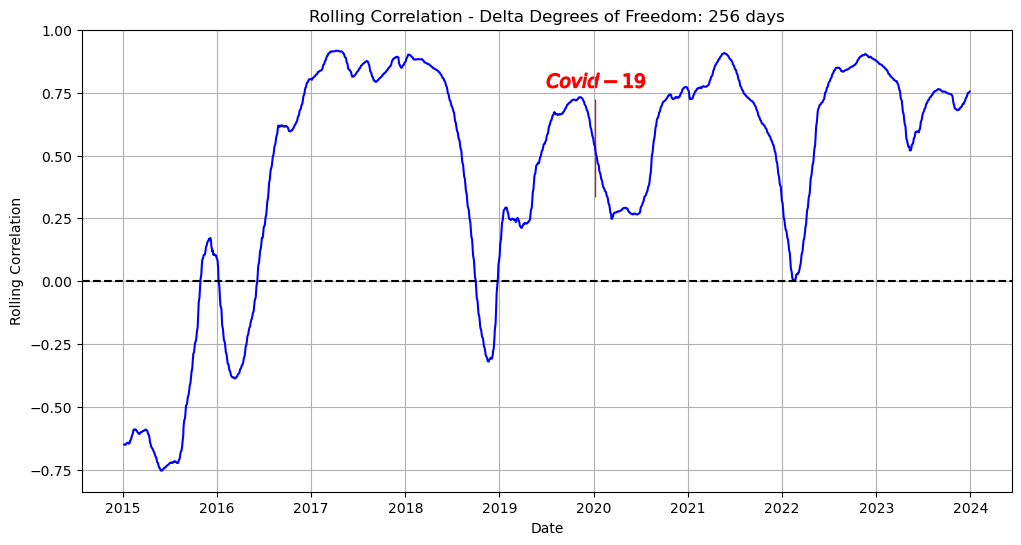

Total average rolling correlation ( ddof = 256 ) : 0.4557


In [56]:
#Set the Delta Degrees of Freedom
ddof = 256

#Rolling correlation over the last ddof days
rollingCorrelation = merged_data['Bitcoin'].rolling(ddof).corr(merged_data['SP500'])
rollingCorrelation.columns =['corr']
# Create Plot
plt.figure(figsize=(12, 6))

# Plot the correlation line in blue
plt.plot(rollingCorrelation.index, rollingCorrelation.values, label='Correlation', color='blue', linestyle='-')

# Mark the zero line in red and dashed
plt.axhline(0, color='black', linestyle='--', label='Zero Line')

# Mark the date on which the first worldwide corona case occurred (January 7, 2020)
marker_date = pd.to_datetime('2020-01-07')
marker_value = rollingCorrelation.loc[marker_date]
plt.scatter(marker_date, marker_value, s=5000, marker ="|", linewidth=1, color='red')
plt.scatter(marker_date, 0.8, s=5000, marker ='$Covid-19$', linewidth=1, color='red')

#Adding a title and axis labelling
plt.title('Rolling Correlation S&P500 and Bitcoin - Delta Degrees of Freedom: 256 days')
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.grid(True)
plt.savefig('Figures/Correlation_S-P500_Bitcoin.png')
plt.show()

#Show the total rolling correlation over the entire graph
print("Total average rolling correlation ( ddof =", ddof,") :", round(x.mean(numeric_only=True), 4))

* Fehlermeldung
* Nachkommastellen auf 2
* Darstellung in Tabelle
* Error in : "Simple Linear Regression - Slope, Intercept, R-Value, STE for the DowJones vs Total Covid Cases"
* ReadME -> brauchen wir alle Datensätze?